# Analysis of Yelp Review data

# Overview

This work is aimed at getting data from an API. The Yelp API is used to get the data from Yelp. Yelp helps people search for different businesses, especially restaurants and make informed choices by looking at the rating and reviews of others.

# Goals

- The goal of work is to learn how to use the Yelp API to get data from Yelp and explore the data. 
    
- The goal is to use the data obtained from the Yelp API, in this case Italian restaurants in New York City to evaluate if ratings are a good way to assess a restaurants or a combination of ratings and reviews. We do this by looking at the mean, median and visualization. 

My hypothesis is that you need to use both ratings and reviews to make a good judgement of the most popular restaurants.

## Motivation and Background

This project is interesting because you learn how to use an API to get data and then use the data to do analysis. 

Each year, millions of people visit New York for both tourist and businesses purposes. According to Wikipedia, about 38 million people visit the Central Park in New York each year. One of the main things that people want to do when the tour is to find a good place to eat. 

Information from this project can be used by a tour company to know how to best advice its customers on most popular Italian restaurants. In addition, this project is useful for someone wanting to learn how to use an API and specifically a Yelp API.

Other people have done similar studies. Some tutorials show how to analyze Yelp sentiments, for example [Yelp Sentiment Analysis](https://www.youtube.com/watch?v=0j3l5GciFIo). Another tutorial is about how to webscrape using YELP API and other [tools](https://www.youtube.com/watch?v=vgHwPPRM5JE).


## 1.1 Code - Yelp API

The first step in using the Yelp API is to get an account. Once you get an account, choose to make an APP, this then let you get an API key that you need for authentication. For more details please check [Yelp](https://www.yelp.com/developers/documentation/v3). 


First, choose an endpoint. In my case, I chose the Business Search Endpoint. This endpoint has a limit of 50, and you can use the offset to get a maximum of 1000. You also have to define a 'term', there is a catalogue listing the different terms you can choose from. I chose Italian restuarants in New York. Below is main code needed to get data from Yelp API. Please refer to the Code file in Table of Contents. 

The code was also set up such that the data received goes to the data folder.

In [ ]:
term = 'Italian'
location = 'NYC'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

i=[]

# Using the range set the offset and limit
for i in range(0,1000,50):
    url_params = {
                    'term': term,
                    'location': location,
                    'limit': SEARCH_LIMIT,
                    'offset': i
                }
response = requests.get(url, headers=headers, params=url_params)

with open('data/yelpdata.json','w') as data_file:
    data_file.write(response.text)

print(response)
print(type(response.text))
print(response.text[:1000])

### Merge files to  one csv file

The data files are saved as json files.All the data files with the raw data were merged by concatenating the DataFrames. The resulting DataFrame was stored as a *.csv* file. This code is in the code file in Table of Contents.

In [ ]:
# Place the yelpdata files into DataFrames for merging
#Merge all the yelpdata files to a csv file

import pandas as pd
import numpy as np
import json

with open('./data/yelpdata1.json') as f1:
    data1=json.load(f1)
    
with open('./data/yelpdata2.json') as f2:
    data2=json.load(f2)
    
with open('./data/yelpdata3.json') as f3:
    data3=json.load(f3)
    
with open('./data/yelpdata4.json') as f4:
    data4=json.load(f4)
    
with open('./data/yelpdata5.json') as f5:
    data5=json.load(f5)

#     
df1=pd.DataFrame(data1['businesses'])
df2=pd.DataFrame(data2['businesses'])
df3=pd.DataFrame(data3['businesses'])
df4=pd.DataFrame(data4['businesses'])
df5=pd.DataFrame(data5['businesses'])

MergeJson=pd.concat([df1,df2,df3,df4,df5])
MergeJson.to_csv("./data/MergeRestaurants.csv")
MergeJson.shape

## 1.2 Data Exploration

Here we get the Yelp data that was stored in the 'data' folder. So that we can explore the data. 

In [13]:
#import libraries needed
#open the csv file
  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

yelpdf=pd.read_csv("./data/MergeRestaurants1.csv")

yelpdf.head(5)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,WG639VkTjmK5dzydd1BBJA,rubirosa-new-york-2,Rubirosa,https://s3-media4.fl.yelpcdn.com/bphoto/LuSzR8...,False,https://www.yelp.com/biz/rubirosa-new-york-2?a...,2258,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.5,"{'latitude': 40.722766, 'longitude': -73.996233}","['delivery', 'pickup']",$$,"{'address1': '235 Mulberry St', 'address2': ''...",1.212965e+10,(212) 965-0500,1932.946770
1,qBGKigOGn_flCx1apxPzlA,piccola-cucina-osteria-new-york,Piccola Cucina Osteria,https://s3-media1.fl.yelpcdn.com/bphoto/U9CN5Q...,False,https://www.yelp.com/biz/piccola-cucina-osteri...,563,"[{'alias': 'italian', 'title': 'Italian'}]",4.5,"{'latitude': 40.72506, 'longitude': -74.00322}","['delivery', 'pickup']",$$,"{'address1': '196 Spring St', 'address2': '', ...",1.646479e+10,(646) 478-7488,2304.888767
2,DoSU8IPq-Py_YV3kYmXPfQ,trattoria-trecolori-new-york,Trattoria Trecolori,https://s3-media4.fl.yelpcdn.com/bphoto/G8vBgH...,False,https://www.yelp.com/biz/trattoria-trecolori-n...,2345,"[{'alias': 'italian', 'title': 'Italian'}]",4.0,"{'latitude': 40.75998, 'longitude': -73.98671}","['delivery', 'pickup']",$$,"{'address1': '254 West 47th St', 'address2': '...",1.212997e+10,(212) 997-4540,6083.735167
3,4zw8vEJNc4mcHh2ARzj2gw,osteria-brooklyn-brooklyn,Osteria Brooklyn,https://s3-media1.fl.yelpcdn.com/bphoto/QzJCcB...,False,https://www.yelp.com/biz/osteria-brooklyn-broo...,26,"[{'alias': 'italian', 'title': 'Italian'}]",4.5,"{'latitude': 40.693154, 'longitude': -73.967177}",[],NaN,"{'address1': '458 Myrtle Ave', 'address2': '',...",1.646751e+10,(646) 750-9156,2663.329278
4,dh5r9-SbN8xJ76XvnayWLQ,giano-restaurant-new-york,Giano Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/0PrOZ5...,False,https://www.yelp.com/biz/giano-restaurant-new-...,600,"[{'alias': 'italian', 'title': 'Italian'}]",4.5,"{'latitude': 40.7262256596862, 'longitude': -7...","['delivery', 'pickup']",$$,"{'address1': '126 E 7th St', 'address2': '', '...",1.212674e+10,(212) 673-7200,2466.500860


In [14]:
# The data has 210 restaurants
yelpdf.shape

(210, 16)

In [26]:
# Search for missing information

yelpdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             210 non-null    object 
 1   alias          210 non-null    object 
 2   name           210 non-null    object 
 3   image_url      210 non-null    object 
 4   is_closed      210 non-null    bool   
 5   url            210 non-null    object 
 6   review_count   210 non-null    int64  
 7   categories     210 non-null    object 
 8   rating         210 non-null    float64
 9   coordinates    210 non-null    object 
 10  transactions   210 non-null    object 
 11  price          190 non-null    object 
 12  location       210 non-null    object 
 13  phone          207 non-null    float64
 14  display_phone  207 non-null    object 
 15  distance       210 non-null    float64
dtypes: bool(1), float64(3), int64(1), object(11)
memory usage: 15.9+ KB


In [27]:
yelpdf.isna()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
208,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


#### Missing data

There area some null values that appear in the price columns, as they appear as True.The price has 20 missing values and the  The price in this case is a criteria used by Yelp to indicate if a restaurant is cheap or expensive. A low priced restaurant has one dollar sign, and an expensive on has four dollar sign. There are many other columns such as image url that are not useful to the data exploration. 

Therefore, we will only concentrate on the columns with information we want to analyze furthere. That is, name, rating, review count.

In [16]:
name=pd.Series(yelpdf['name'])
rate=pd.Series(yelpdf['rating'])
review=pd.Series(yelpdf['review_count'])
closed=pd.Series(yelpdf['is_closed'])

food=pd.DataFrame({'Name':name,'Rating':rate,'Reviews':review,'Closed':closed})

food.head(5)

,Name,Rating,Reviews,Closed
0,Rubirosa,4.5,2258,False
1,Piccola Cucina Osteria,4.5,563,False
2,Trattoria Trecolori,4.0,2345,False
3,Osteria Brooklyn,4.5,26,False
4,Giano Restaurant,4.5,600,False


All the restaurants we are analyzing are open, meaning they are all valid option for dining in. 

In [9]:
food.groupby('Closed').count()

,Name,Rating,Reviews
Closed,,,
False,210,210,210


In [12]:
food.describe()

,Rating,Reviews
count,210.000000,210.000000
mean,3.964286,290.709524
std,0.440107,482.211806
min,3.000000,1.000000
25%,3.500000,80.250000
50%,4.000000,141.000000
75%,4.500000,260.000000
max,5.000000,3781.000000


Above we see that the minimum rating is 3. Looking at the rating and review table below, we see that the median is better because restaurants with a high review count make the mean higher. Restaurants with an average rating of 4 have the mosts reviews.

In [22]:
food.groupby('Rating')['Reviews'].aggregate(["mean","median"])

,mean,median
Rating,,
3.0,270.500000,90.0
3.5,211.966667,165.0
4.0,399.220930,185.5
4.5,226.372549,119.0
5.0,57.800000,19.0


In the table below we look at the restaurants with the highest rating and arrange from the highest to the lowest. 
It is evident that some of the ones with the highest rating also have the lowest reviews.

In [18]:
food=food.sort_values(by='Rating', ascending = True)
display(food.head())

,Name,Rating,Reviews,Closed
162,Serafina,3.0,75,False
71,Spolini's,3.0,105,False
70,Serra by Birreria at Eataly Flatiron,3.0,1487,False
165,Amici Ristorante,3.0,7,False
35,Manganaro's Hero Boy,3.0,198,False


The table below shows that restaurants with the highest number of reviews, also have a high rating. 

In [5]:
food=food.sort_values(by='Reviews',ascending = False)
display(food.head())

,Name,Rating,Reviews,Closed
6,Carmine's Italian Restaurant - Times Square,4.0,3781,False
45,Bleecker Street Pizza,4.0,2362,False
187,Bleecker Street Pizza,4.0,2362,False
2,Trattoria Trecolori,4.0,2345,False
0,Rubirosa,4.5,2258,False



From the graph below it is clear that most of the Italian restaurants have a rating of 4 and above.

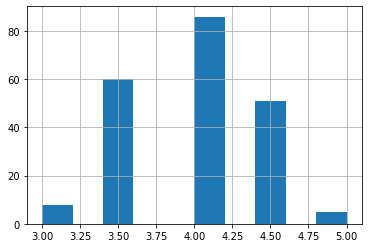

In [28]:
# Make a histogram for rating
yelpdf['rating'].hist()

The review count shows that mosts restaurants have between 0 to 500 reviews. However, there are afew with high number of reviews.

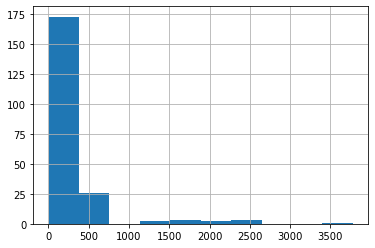

In [29]:
# Make a histogram for review_count
yelpdf['review_count'].hist()

From the table and graph below, most of the restaurants with 4 and 4.5 have the most reviews, probably indicating their popularity. 

In [7]:
food.groupby('Rating')[['Reviews']].sum()

,Reviews
Rating,
3.0,2164
3.5,12718
4.0,34333
4.5,11545
5.0,289


Text(0, 0.5, 'Reviews')

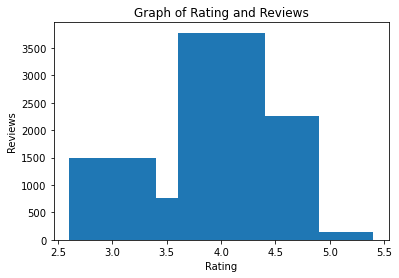

In [11]:
rate=np.array(food['Rating'])
review=np.array(food['Reviews'])

plt.bar(rate,review)
plt.title('Graph of Rating and Reviews')
plt.xlabel('Rating')
plt.ylabel('Reviews')

### Conclusion

- Based on the exploration it is best to use a combination of ratings and reviews to make a good judgement of an Italian restaurant. This is because 2 restaurants had a rating of 5, but only 1 review. 
- Many people enjoy Italian restaurants because no restaurant had a rating less than 3.

My hypothesis is correct you need to use both ratings and review to make an informed decision on popular restaurant. 

### Limitations
There could be other factors that make the restaurants popular such as proximity to a popular tourist attraction. 

## Software Requirements

**Libraries needed for API:** Requests, Numpy, Pandas, Confiparser, Json

**Libraries needed for Data Exploration:** Numpy, Pandas, Matplotlib

## Data

The data was from a derived by using the Yelp API. To get the data using the Yelp API requires authentication, that means getting an API key. Required parameters are terms and location. The dataset used in this project is Italian Restaurants in New York City. 

## References

- [Wikipedia](https://en.wikipedia.org/wiki/Central_Park)
- Kazil and Jarmul, Data Wrangling with Python: Tips and Tools to Make Your Life Easier, O'Reilly 2016
- [Yelp](https://www.yelp.com/developers/documentation/v3)
- [Webscraping with requests](https://www.youtube.com/watch?v=vgHwPPRM5JE)
- [Config Files](https://www.youtube.com/watch?v=Gdw0-QGq-z0)
